# Basic PVT Setup and Example

In [15]:
from ia.gaius.manager import AgentManager

In [ ]:
am = AgentManager()

In [ ]:
agent = am.start_agent(genome_name='simple.genome', agent_id='pvt',
                       user_id='tutorial', agent_name='tutorial-pvt').get_agent_client()

In [18]:
agent.connect()

{'connection': 'okay', 'agent': 'simple'}

In [19]:
agent.show_status()

{'AUTOLEARN': False,
 'PREDICT': True,
 'SLEEPING': False,
 'emotives': {},
 'last_learned_model_name': '',
 'models_kb': '{KB| objects: 0}',
 'name': 'P1',
 'num_observe_call': 0,
 'size_WM': 0,
 'target': '',
 'time': 0,
 'vectors_kb': '{KB| objects: 0}'}

In [20]:
agent.get_all_genes(nodes=['P1'])

{'genes': {'SORT': 'sorting',
  'always_update_frequencies': False,
  'auto_learn_algorithm': 'basic',
  'auto_learn_metric': 'wm_size',
  'classifier': 'CVC',
  'max_predictions': 100,
  'max_sequence_length': 0,
  'near_vector_count': 3,
  'persistence': 5,
  'predict_on_nth_event': 1,
  'prediction_sort_metric': 'potential',
  'prediction_threshold': 0,
  'prediction_threshold_direction': 'greater than',
  'prediction_threshold_metric': 'potential',
  'quiescence': 3,
  'recall_threshold': 0.1,
  'search_depth': 10,
  'smoothness': 3,
  'wm_resolution': 'symbol'}}

## Iris Dataset Training

In [21]:
from ia.gaius.pvt import PerformanceValidationTest

In [22]:
pvt = PerformanceValidationTest(agent=agent, ingress_nodes=['P1'], query_nodes=['P1'], num_of_tests=1, pct_of_ds=100, pct_res_4_train=80,
                                test_type='classification', dataset_location='filepath', results_filepath=None,
                                ds_filepath='../../../tests/datasets/shuffled_iris_flowers', test_prediction_strategy='noncontinuous',
                                clear_all_memory_before_training=True, turn_prediction_off_during_training=False, shuffle=False)

num_of_tests      = 1
ds_filepath       = ../../../tests/datasets/shuffled_iris_flowers
pct_of_ds         = 100
pct_res_4_train   = 80
summarize_for_single_node status   = False


Conducting Classification PVT...

Conducting Test # 0

---------------------
Length of Training Set = 120
Length of Testing Set  = 30
Clearing memory of selected ingress nodes...
Preparing to train agent...


  0%|           0/120 [? ?it/s]

Finished training agent!


  0%|           0/30 [? ?it/s]

Getting Classification Metrics...
Plotting Results...


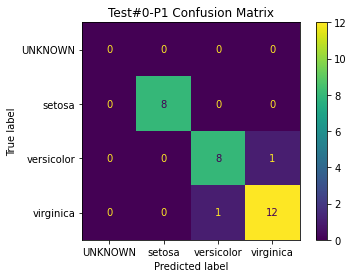

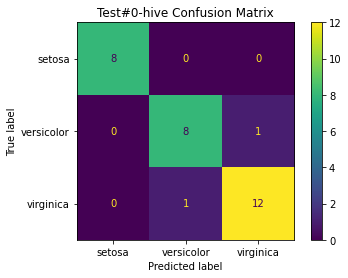

In [23]:
pvt.conduct_pvt()

In [24]:
pvt.pvt_results[0]['P1']['metrics']

{'response_counts': 30.0,
 'true_positive': 28.0,
 'false_positive': 2.0,
 'false_discovery_rate': 0.06666666666666667,
 'f1': 0.9655172413793104,
 'precision': 93.33333333333333,
 'accuracy': 93.33333333333333,
 'response_percentage': 100.0,
 'unknown_percentage': 0.0}

In [ ]:
am.delete_agent('tutorial-pvt')